In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
#1.	Load the data file using pandas.

In [6]:
data = pd.read_csv("F:/Courses/Simpli Learn/Data Analytics/3 Data Analytics with Python/Live Classes/Project/googleplaystore/googleplaystore.csv")

In [7]:
data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [15]:
#2.	Check for null values in the data. Get the number of null values for each column.

In [16]:
data.isna().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [17]:
#3.	Drop records with nulls in any of the columns. 

In [18]:
data1 = data.dropna()

In [19]:
data1.isna().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [21]:
#4.	Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 
#4.1.	Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
#4.1.2.	Multiply the value by 1,000, if size is mentioned in Mb

In [22]:
data1['Size'] = data1['Size'].str.replace('M', '000', regex = True)

C:\Users\Amar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
data1['Size'] = data1['Size'].str.replace('.', '', regex = True)

C:\Users\Amar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
data1['Size'] = data1['Size'].str.replace('k', '', regex = True)

C:\Users\Amar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
data1['Size']

0                     19000
1                     14000
2                     87000
3                     25000
4                     28000
                ...        
10834                 26000
10836                 53000
10837                 36000
10839    Varies with device
10840                 19000
Name: Size, Length: 9360, dtype: object

In [26]:
data1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [27]:
#4.1.1.	Extract the numeric value from the column

In [28]:
data1.isna().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [29]:
data1['Size'] = data1['Size'][data1['Size'].str.isdigit() == True].copy()

C:\Users\Amar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
data2 = data1.dropna()

In [31]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
App               7723 non-null object
Category          7723 non-null object
Rating            7723 non-null float64
Reviews           7723 non-null object
Size              7723 non-null object
Installs          7723 non-null object
Type              7723 non-null object
Price             7723 non-null object
Content Rating    7723 non-null object
Genres            7723 non-null object
Last Updated      7723 non-null object
Current Ver       7723 non-null object
Android Ver       7723 non-null object
dtypes: float64(1), object(12)
memory usage: 844.7+ KB


In [32]:
data2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,26000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [33]:
#4.2.	Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [34]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
App               7723 non-null object
Category          7723 non-null object
Rating            7723 non-null float64
Reviews           7723 non-null object
Size              7723 non-null object
Installs          7723 non-null object
Type              7723 non-null object
Price             7723 non-null object
Content Rating    7723 non-null object
Genres            7723 non-null object
Last Updated      7723 non-null object
Current Ver       7723 non-null object
Android Ver       7723 non-null object
dtypes: float64(1), object(12)
memory usage: 844.7+ KB


In [35]:
data2['Reviews'] = data2['Reviews'].astype(int)

C:\Users\Amar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
App               7723 non-null object
Category          7723 non-null object
Rating            7723 non-null float64
Reviews           7723 non-null int32
Size              7723 non-null object
Installs          7723 non-null object
Type              7723 non-null object
Price             7723 non-null object
Content Rating    7723 non-null object
Genres            7723 non-null object
Last Updated      7723 non-null object
Current Ver       7723 non-null object
Android Ver       7723 non-null object
dtypes: float64(1), int32(1), object(11)
memory usage: 814.5+ KB


In [37]:
#4.3.	Installs field is currently stored as string and has values like 1,000,000+. 
#4.3.1.	Treat 1,000,000+ as 1,000,000
#4.3.2.	remove ‘+’, ‘,’ from the field, convert it to integer

In [38]:
data2['Installs'] = data2['Installs'].str.replace('+', '', regex = True)

C:\Users\Amar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
data2['Installs'] = data2['Installs'].str.replace(',', '', regex = True)

C:\Users\Amar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
data2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619,1000,Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,26000,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [41]:
data2['Installs'] = data2['Installs'].astype(int)

C:\Users\Amar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
App               7723 non-null object
Category          7723 non-null object
Rating            7723 non-null float64
Reviews           7723 non-null int32
Size              7723 non-null object
Installs          7723 non-null int32
Type              7723 non-null object
Price             7723 non-null object
Content Rating    7723 non-null object
Genres            7723 non-null object
Last Updated      7723 non-null object
Current Ver       7723 non-null object
Android Ver       7723 non-null object
dtypes: float64(1), int32(2), object(10)
memory usage: 784.4+ KB


In [43]:
#4.4.	Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [44]:
data2['Price'] = data2['Price'].str.replace('$', '', regex = True)

C:\Users\Amar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
data2['Price'] = data2['Price'].astype(float)

C:\Users\Amar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
App               7723 non-null object
Category          7723 non-null object
Rating            7723 non-null float64
Reviews           7723 non-null int32
Size              7723 non-null object
Installs          7723 non-null int32
Type              7723 non-null object
Price             7723 non-null float64
Content Rating    7723 non-null object
Genres            7723 non-null object
Last Updated      7723 non-null object
Current Ver       7723 non-null object
Android Ver       7723 non-null object
dtypes: float64(2), int32(2), object(9)
memory usage: 784.4+ KB


In [47]:
#5. Sanity checks:
#5.1.	Average rating should be between 1 and 5 as only these values are allowed on the play store.
# Drop the rows that have a value outside this range.

In [48]:
#s2[s2.str.isdigit() == True].copy()
#s2.loc[s2.str.isdigit()]
#data2.loc[(data2.Rating < 5.0)]
#data2.loc[(data2.Rating > 1.0)]
#data2.loc[(1< data2.Rating)]
data2 = data2.loc[data2.Rating.between(1.0 , 5.0)]
#data2['Rating'] = data2.loc[(data2['Rating'] >= 1.0) & (data2['Rating'] <= 5.0)]

In [49]:
data2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,26000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [50]:
#5.2.	Reviews should not be more than installs as only those who installed can review the app. 
#If there are any such records, drop them.

In [51]:
data2['R<=I'] = (data2['Reviews'] <= data2['Installs'])

In [52]:
data3 = data2.loc[data2['R<=I']]

In [53]:
data3 = data3.drop(columns = 'R<=I')

In [54]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 10840
Data columns (total 13 columns):
App               7717 non-null object
Category          7717 non-null object
Rating            7717 non-null float64
Reviews           7717 non-null int32
Size              7717 non-null object
Installs          7717 non-null int32
Type              7717 non-null object
Price             7717 non-null float64
Content Rating    7717 non-null object
Genres            7717 non-null object
Last Updated      7717 non-null object
Current Ver       7717 non-null object
Android Ver       7717 non-null object
dtypes: float64(2), int32(2), object(9)
memory usage: 783.8+ KB


In [55]:
#5.3.	For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [56]:
data4 = data3.loc[(data3['Price'] <= 0) & data3['Type'].isin(['Free']) | (data3['Price'] >= 0) & data3['Type'].isin(['Paid'])]

In [57]:
data4['Rating'] = data4['Rating'].astype(float)

In [58]:
data4['Size'] = data4['Size'].astype(int)

In [59]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 10840
Data columns (total 13 columns):
App               7717 non-null object
Category          7717 non-null object
Rating            7717 non-null float64
Reviews           7717 non-null int32
Size              7717 non-null int32
Installs          7717 non-null int32
Type              7717 non-null object
Price             7717 non-null float64
Content Rating    7717 non-null object
Genres            7717 non-null object
Last Updated      7717 non-null object
Current Ver       7717 non-null object
Android Ver       7717 non-null object
dtypes: float64(2), int32(3), object(8)
memory usage: 753.6+ KB


In [60]:
data4.describe()

,Rating,Reviews,Size,Installs,Price
count,7717.000000,7.717000e+03,7717.000000,7.717000e+03,7717.000000
mean,4.173293,2.951275e+05,39789.025398,8.430620e+06,1.128725
std,0.544362,1.864640e+06,25192.753032,5.017636e+07,17.414784
min,1.000000,1.000000e+00,14.000000,5.000000e+00,0.000000
25%,4.000000,1.090000e+02,20000.000000,1.000000e+04,0.000000
50%,4.300000,2.351000e+03,34000.000000,1.000000e+05,0.000000
75%,4.500000,3.910900e+04,57000.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,100000.000000,1.000000e+09,400.000000


In [61]:
data4.to_csv('file1.csv')

In [62]:
#6. Performing univariate analysis: 
#•	Boxplot for Price
#•	Are there any outliers? Think about the price of usual apps on Play Store.

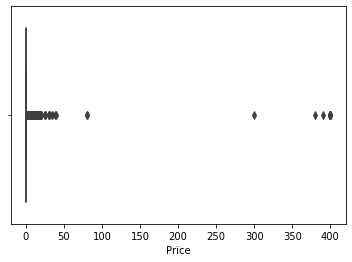

In [63]:
sns.boxplot(data4.Price)

In [64]:
#•	Boxplot for Reviews
#•	Are there any apps with very high number of reviews? Do the values seem right?

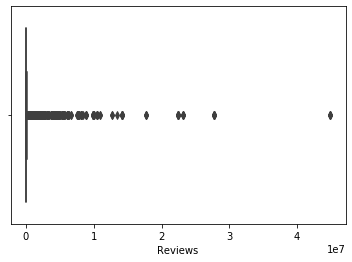

In [65]:
sns.boxplot(data4.Reviews)

In [66]:
#•	Histogram for Rating
#•	How are the ratings distributed? Is it more toward higher ratings?

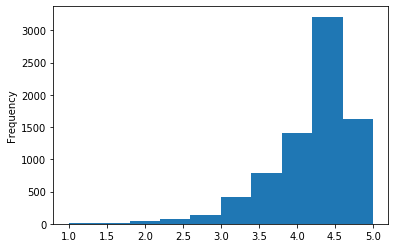

In [67]:
data4.Rating.plot.hist()

In [68]:
#•	Histogram for Size
#Note down your observations for the plots made above. Which of these seem to have outliers?

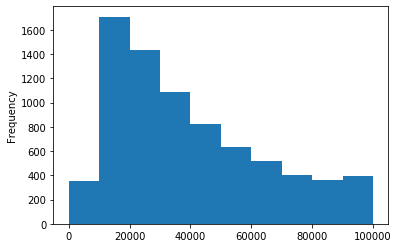

In [69]:
data4.Size.plot.hist()

In [70]:
#7. Outlier treatment: 
#1.	Price: From the box plot, it seems like there are some apps with very high price. 
#A price of $200 for an application on the Play Store is very high and suspicious!
#1.	Check out the records with very high price
#1.	Is 200 indeed a high price?

In [71]:
data4.Price.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10    0.00
0.25    0.00
0.50    0.00
0.70    0.00
0.90    0.00
0.95    1.99
0.99    9.99
Name: Price, dtype: float64

In [72]:
#2.	Drop these as most seem to be junk apps

In [73]:
data5 = data4[data4.Price < 200].copy()

In [74]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7702 entries, 0 to 10840
Data columns (total 13 columns):
App               7702 non-null object
Category          7702 non-null object
Rating            7702 non-null float64
Reviews           7702 non-null int32
Size              7702 non-null int32
Installs          7702 non-null int32
Type              7702 non-null object
Price             7702 non-null float64
Content Rating    7702 non-null object
Genres            7702 non-null object
Last Updated      7702 non-null object
Current Ver       7702 non-null object
Android Ver       7702 non-null object
dtypes: float64(2), int32(3), object(8)
memory usage: 752.1+ KB


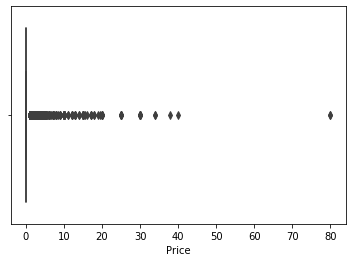

In [75]:
sns.boxplot(data5.Price)

In [76]:
#2.	Reviews: Very few apps have very high number of reviews. 
#These are all star apps that don’t help with the analysis and, in fact, will skew it. 
#Drop records having more than 2 million reviews.

In [77]:
data6 = data5[data5.Reviews < 2000000].copy()

In [78]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 10840
Data columns (total 13 columns):
App               7483 non-null object
Category          7483 non-null object
Rating            7483 non-null float64
Reviews           7483 non-null int32
Size              7483 non-null int32
Installs          7483 non-null int32
Type              7483 non-null object
Price             7483 non-null float64
Content Rating    7483 non-null object
Genres            7483 non-null object
Last Updated      7483 non-null object
Current Ver       7483 non-null object
Android Ver       7483 non-null object
dtypes: float64(2), int32(3), object(8)
memory usage: 730.8+ KB


In [79]:
#3.	Installs:  There seems to be some outliers in this field too. 
#Apps having very high number of installs should be dropped from the analysis.
#1.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
#2.	Decide a threshold as cutoff for outlier and drop records having values more than that

In [80]:
data6.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10        1000.0
0.25       10000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Installs, dtype: float64

In [81]:
data7 = data6[data6.Installs < 10000000].copy()

In [82]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6489 entries, 0 to 10837
Data columns (total 13 columns):
App               6489 non-null object
Category          6489 non-null object
Rating            6489 non-null float64
Reviews           6489 non-null int32
Size              6489 non-null int32
Installs          6489 non-null int32
Type              6489 non-null object
Price             6489 non-null float64
Content Rating    6489 non-null object
Genres            6489 non-null object
Last Updated      6489 non-null object
Current Ver       6489 non-null object
Android Ver       6489 non-null object
dtypes: float64(2), int32(3), object(8)
memory usage: 633.7+ KB


In [83]:
#8. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, 
#i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features)
#to assess the relations between rating and the other features.
#1.	Make scatter plot/joinplot for Rating vs. Price
#1.	What pattern do you observe? Does rating increase with price?

<Figure size 1440x864 with 0 Axes>

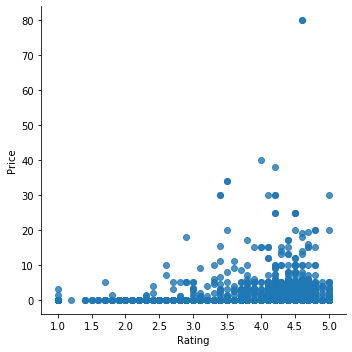

In [84]:
plt.figure(figsize=[20,12])
sns.lmplot('Rating','Price',data=data7,fit_reg=False)

In [85]:
#2.	Make scatter plot/joinplot for Rating vs. Size
#1.	Are heavier apps rated better?

<Figure size 1440x864 with 0 Axes>

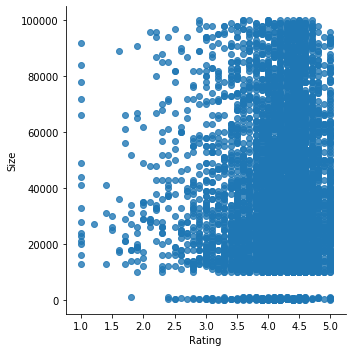

In [86]:
plt.figure(figsize=[20,12])
sns.lmplot('Rating','Size',data=data7,fit_reg=False)

In [87]:
#3.	Make scatter plot/joinplot for Rating vs. Reviews
#1.	Does more review mean a better rating always?

<Figure size 1440x864 with 0 Axes>

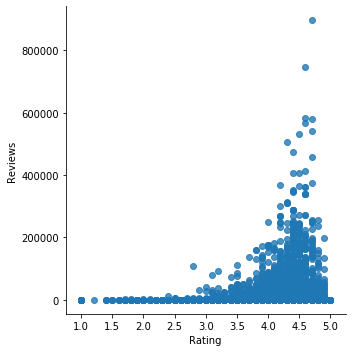

In [88]:
plt.figure(figsize=[20,12])
sns.lmplot('Rating','Reviews',data=data7,fit_reg=False)

In [89]:
#4.	Make boxplot for Rating vs. Content Rating
#1.	Is there any difference in the ratings? Are some types liked better?

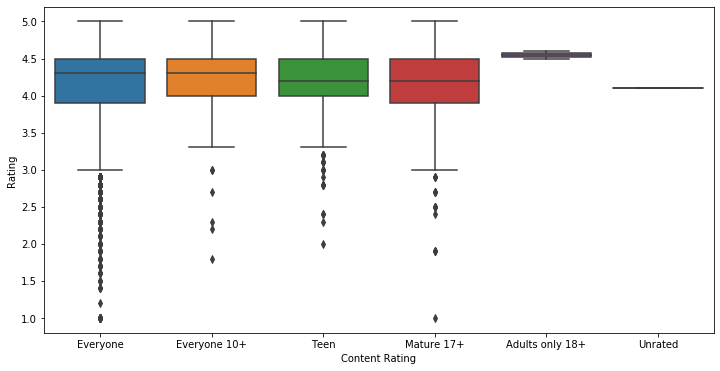

In [90]:
plt.figure(figsize=[12,6])
sns.boxplot("Content Rating", "Rating", data=data7)

In [91]:
#5.	Make boxplot for Ratings vs. Category
#1.	Which genre has the best ratings?
#For each of the plots above, note down your observation.

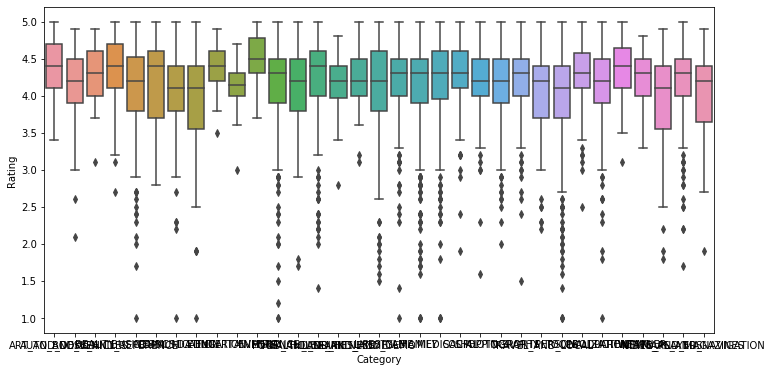

In [92]:
plt.figure(figsize=[12,6])
sns.boxplot("Category", "Rating", data=data7)

In [93]:
#9. Data preprocessing
#For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
#1.	Reviews and Install have some values that are still relatively very high. Before building a linear regression model
#, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [94]:
inp1 = data7.copy()

In [95]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6489 entries, 0 to 10837
Data columns (total 13 columns):
App               6489 non-null object
Category          6489 non-null object
Rating            6489 non-null float64
Reviews           6489 non-null int32
Size              6489 non-null int32
Installs          6489 non-null int32
Type              6489 non-null object
Price             6489 non-null float64
Content Rating    6489 non-null object
Genres            6489 non-null object
Last Updated      6489 non-null object
Current Ver       6489 non-null object
Android Ver       6489 non-null object
dtypes: float64(2), int32(3), object(8)
memory usage: 633.7+ KB


In [96]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,56000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [97]:
inp1['Reviews'] = np.log1p(inp1['Reviews'])

In [98]:
inp1['Installs'] = np.log1p(inp1['Installs'])

In [99]:
inp1['Size'] = np.log1p(inp1['Size'])

In [100]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,9.852247,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,9.546884,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,11.373675,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,10.239996,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,10.933125,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [101]:
#2.	Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [102]:
cols_to_drop = ['App', 'Last Updated', 'Current Ver', 'Android Ver']

In [103]:
inp1_1 = inp1.drop(cols_to_drop, axis=1).copy()

In [104]:
inp1_1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,9.852247,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,9.546884,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,11.373675,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,10.239996,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,10.933125,10.819798,Free,0.0,Everyone,Art & Design


In [105]:
#3.	Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not 
#understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields 
#to numeric. Name of dataframe should be inp2.

In [113]:
final = inp1_1.copy()

In [114]:
final.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,9.852247,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,9.546884,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,11.373675,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,10.239996,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,10.933125,10.819798,Free,0.0,Everyone,Art & Design


In [117]:
final['Type'].value_counts()

0    5930
1     559
Name: Type, dtype: int64

In [116]:
final['Type'] = final['Type'].replace(['Paid', 'Free'], [1, 0])

In [123]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6489 entries, 0 to 10837
Data columns (total 9 columns):
Category          6489 non-null object
Rating            6489 non-null float64
Reviews           6489 non-null float64
Size              6489 non-null float64
Installs          6489 non-null float64
Type              6489 non-null int64
Price             6489 non-null float64
Content Rating    6489 non-null object
Genres            6489 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 507.0+ KB


In [133]:
#final['Category'].value_counts()

In [0]:
#final['Category'] = final.apply(lambda x: x.mask(x.map(x.value_counts())<100, 'other') if x.name!=['Category'] else x)

In [135]:
#cols = ['Category']
#for col in cols:
#    val = final[col].value_counts()
#    y = val[val < 100].index
#    final[col] = final[col].replace({x:'other' for x in y})
#print (final)

In [136]:
#final['Content Rating'].value_counts()

In [137]:
#cols = ['Content Rating']
#for col in cols:
#    val = final[col].value_counts()
#    y = val[val < 100].index
#    final[col] = final[col].replace({x:'other' for x in y})
#print (final)

In [138]:
#final['Genres'].value_counts()

In [139]:
#cols = ['Genres']
#for col in cols:
#    val = final[col].value_counts()
#    y = val[val < 100].index
#    final[col] = final[col].replace({x:'other' for x in y})
#print (final)

In [140]:
final

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,9.852247,9.210440,0,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,9.546884,13.122365,0,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,11.373675,15.424949,0,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,10.239996,11.512935,0,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,10.933125,10.819798,0,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...
10832,WEATHER,3.8,7.086738,6.368187,11.512935,0,0.0,Everyone,Weather
10833,BOOKS_AND_REFERENCE,4.8,3.806662,6.429719,6.908755,0,0.0,Everyone,Books & Reference
10834,FAMILY,4.0,2.079442,10.165890,6.216606,0,0.0,Everyone,Education
10836,FAMILY,4.5,3.663562,10.878066,8.517393,0,0.0,Everyone,Education


In [141]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''

    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)

        # Collect the revised columns
        output = output.join(col_data)

    return output

In [142]:
X_all = preprocess_features(final)

In [147]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6489 entries, 0 to 10837
Columns: 153 entries, Category_ART_AND_DESIGN to Genres_Word
dtypes: float64(5), int64(1), uint8(147)
memory usage: 1.6 MB


In [144]:
import os
os.getcwd()

'C:\\Users\\Amar\\Downloads'

In [145]:
X_all.to_csv('Xall.csv')

In [0]:
#col_to_categorize = ['Category', 'Type', 'Content Rating', 'Genres']

In [263]:
categorical_columns = X_all.columns

In [150]:
X = X_all.drop(['Rating'], axis=1)
y = X_all['Rating']

In [151]:
X

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10833,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
y

0        4.1
1        3.9
2        4.7
4        4.3
5        4.4
        ... 
10832    3.8
10833    4.8
10834    4.0
10836    4.5
10837    5.0
Name: Rating, Length: 6489, dtype: float64

In [0]:
#from sklearn.preprocessing import OneHotEncoder
#for var in categorical_columns:
 # onehotencoder = OneHotEncoder()
 # final[var]= onehotencoder.fit_transform(final[var]).toarray()

In [134]:
#from sklearn.preprocessing import OneHotEncoder
#X_onehotencoder = OneHotEncoder()
#X = X_onehotencoder.fit_transform(X).toarray()
#print (X)

In [146]:
#from sklearn.preprocessing import OneHotEncoder
#oneHot = OneHotEncoder()
#x_ohe = oneHot.fit_transform(final[col_to_categorize].values.reshape(-1,1)).toarray()
#x_ohe

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 42)

In [158]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4542, 152)
(1947, 152)
(4542,)
(1947,)


In [266]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs = -1)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [216]:
print(model.intercept_)
print(model.coef_)

-334091977990.34625
[ 3.60791403e+11  7.46449430e+11 -3.76082318e+11  2.60271535e+11
 -1.57963789e+12 -3.25762580e+12  7.69714034e+11 -7.62424351e+11
  3.60791403e+11  3.60791403e+11 -1.29011767e+12  3.60791403e+11
 -4.24225311e+11  2.52783509e+12  3.60791403e+11  1.51128959e+11
  2.58603685e+12 -2.05848321e+11  2.03353602e+12  1.16423065e+12
  2.06982318e+12 -6.52852035e+11  3.97543280e+11  1.55309401e+11
  5.46593394e+11 -1.96062489e+11  1.93654543e+11  3.63095054e+11
  3.60791403e+11  1.04764385e+12  2.11980176e+10  3.60791403e+11
  1.74213128e+11  1.71142578e-01  5.37109375e-03 -1.53564453e-01
 -9.67712402e-02  0.00000000e+00  5.16428057e+09  5.16428057e+09
  5.16428057e+09  5.16428057e+09  5.16428057e+09 -3.72862594e+10
 -3.18637053e+10 -3.18637053e+10 -3.18637053e+10 -3.18637053e+10
  1.87697153e+09 -3.18637053e+10 -3.18637053e+10 -3.18637053e+10
 -3.18637053e+10 -3.18637053e+10 -3.18637053e+10 -4.17521733e+11
  7.05010016e+11 -3.18637053e+10 -3.18637053e+10 -3.18637053e+10
 -3.1

In [264]:
list(zip(categorical_columns,model.coef_))

[('Category_ART_AND_DESIGN', 360791402720.638),
 ('Category_AUTO_AND_VEHICLES', 746449430090.9478),
 ('Category_BEAUTY', -376082318105.9716),
 ('Category_BOOKS_AND_REFERENCE', 260271534836.42688),
 ('Category_BUSINESS', -1579637887161.0647),
 ('Category_COMICS', -3257625796257.1904),
 ('Category_COMMUNICATION', 769714033985.6328),
 ('Category_DATING', -762424350714.8866),
 ('Category_EDUCATION', 360791402720.944),
 ('Category_ENTERTAINMENT', 360791402720.8134),
 ('Category_EVENTS', -1290117672109.5417),
 ('Category_FAMILY', 360791402720.9169),
 ('Category_FINANCE', -424225311014.2144),
 ('Category_FOOD_AND_DRINK', 2527835086902.9746),
 ('Category_GAME', 360791402721.1216),
 ('Category_HEALTH_AND_FITNESS', 151128958637.23444),
 ('Category_HOUSE_AND_HOME', 2586036854949.2734),
 ('Category_LIBRARIES_AND_DEMO', -205848321046.10672),
 ('Category_LIFESTYLE', 2033536015175.9546),
 ('Category_MAPS_AND_NAVIGATION', 1164230648844.6333),
 ('Category_MEDICAL', 2069823175055.8933),
 ('Category_NEWS

In [265]:
model.predict(X_test)

array([4.222229  , 3.85858154, 4.35906982, ..., 4.16082764, 4.42956543,
       4.0546875 ])

In [223]:
print('R2 Value/Coefficient of Determination: {}'.format(model.score(X_test, y_test)))

R2 Value/Coefficient of Determination: -1.9718843067144776e+22


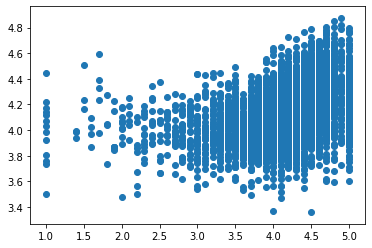

In [163]:
plt.scatter(y_train,model.predict(X_train))

In [164]:
from math import sqrt
from sklearn.metrics import mean_squared_error
print(sqrt(mean_squared_error(y_train, model.predict(X_train))))

0.5378278421293847


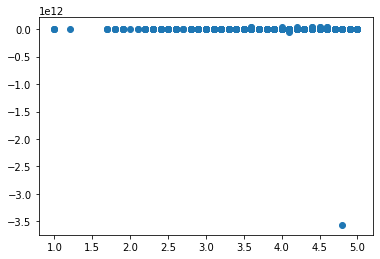

In [165]:
plt.scatter(y_test,model.predict(X_test))

In [166]:
print(sqrt(mean_squared_error(y_test, model.predict(X_test))))

80847788598.82877


In [235]:
#pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(X_test)}).head(10)
result = pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(X_test)})
print(result)

       Actual  Predicted
6533      4.3   4.222229
9230      3.4   3.858582
1810      4.5   4.359070
1207      3.8   4.273621
5195      4.0   4.003967
...       ...        ...
6658      4.3   4.146912
9857      4.2   4.271423
7422      5.0   4.160828
10833     4.8   4.429565
6666      4.5   4.054688

[1947 rows x 2 columns]
